In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#学習データとテストデータをtrain/test変数に格納
train = pd.read_csv('/content/drive/MyDrive/signate_毒キノコ/train.tsv', sep='\t')
test = pd.read_csv('/content/drive/MyDrive/signate_毒キノコ/test.tsv', sep='\t')

In [ ]:
#学習データ(train)の確認
train.head(10)

,id,Y,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,p,f,y,n,f,f,f,c,n,...,k,w,w,p,w,o,e,w,v,d
1,2,p,f,y,y,f,f,f,c,b,...,k,b,p,p,w,o,l,h,y,g
2,3,e,b,y,w,t,l,f,c,b,...,s,w,w,p,w,o,p,k,n,m
3,5,p,x,s,b,t,f,f,c,b,...,s,w,w,p,w,o,p,h,v,u
4,7,p,x,s,w,t,f,f,c,b,...,f,w,w,p,w,o,p,h,v,g
5,10,e,f,s,n,f,n,a,c,b,...,s,o,o,p,o,o,p,o,c,l
6,11,p,x,y,n,f,s,f,c,n,...,k,w,w,p,w,o,e,w,v,p
7,13,p,k,y,e,f,s,f,c,n,...,k,w,w,p,w,o,e,w,v,p
8,16,e,x,y,y,t,l,f,c,b,...,s,w,w,p,w,o,p,n,s,g
9,19,p,f,y,e,f,f,f,c,n,...,k,w,w,p,w,o,e,w,v,d


In [ ]:
#テストデータ(test)の確認
test.head()

,id,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,w,t,f,f,c,b,p,...,f,w,w,p,w,o,p,h,v,g
1,4,f,y,g,t,n,f,c,b,n,...,s,p,g,p,w,o,p,n,y,d
2,6,x,y,e,t,n,f,c,b,w,...,s,w,p,p,w,o,p,n,y,d
3,8,f,s,g,t,f,f,c,b,p,...,s,w,w,p,w,o,p,h,v,g
4,9,x,s,e,f,y,f,c,n,b,...,s,w,w,p,w,o,e,w,v,l


In [ ]:
#データサイズの確認
print(train.shape)
print(test.shape)

(4062, 24)
(4062, 23)


In [ ]:
#学習データの各データの型と欠損値の有無の確認
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4062 entries, 0 to 4061
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        4062 non-null   int64 
 1   Y                         4062 non-null   object
 2   cap-shape                 4062 non-null   object
 3   cap-surface               4062 non-null   object
 4   cap-color                 4062 non-null   object
 5   bruises                   4062 non-null   object
 6   odor                      4062 non-null   object
 7   gill-attachment           4062 non-null   object
 8   gill-spacing              4062 non-null   object
 9   gill-size                 4062 non-null   object
 10  gill-color                4062 non-null   object
 11  stalk-shape               4062 non-null   object
 12  stalk-root                4062 non-null   object
 13  stalk-surface-above-ring  4062 non-null   object
 14  stalk-surface-below-ring

In [ ]:
#テストデータの各データのDtypeと欠損値の有無の確認
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4062 entries, 0 to 4061
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        4062 non-null   int64 
 1   cap-shape                 4062 non-null   object
 2   cap-surface               4062 non-null   object
 3   cap-color                 4062 non-null   object
 4   bruises                   4062 non-null   object
 5   odor                      4062 non-null   object
 6   gill-attachment           4062 non-null   object
 7   gill-spacing              4062 non-null   object
 8   gill-size                 4062 non-null   object
 9   gill-color                4062 non-null   object
 10  stalk-shape               4062 non-null   object
 11  stalk-root                4062 non-null   object
 12  stalk-surface-above-ring  4062 non-null   object
 13  stalk-surface-below-ring  4062 non-null   object
 14  stalk-color-above-ring  

In [ ]:
#ID列を別のデータに保管
train_ID = train['id']
test_ID = test['id']
#学習データとテストデータからId列を削除
train = train.drop(['id'], axis=1)
test = test.drop(['id'], axis=1)

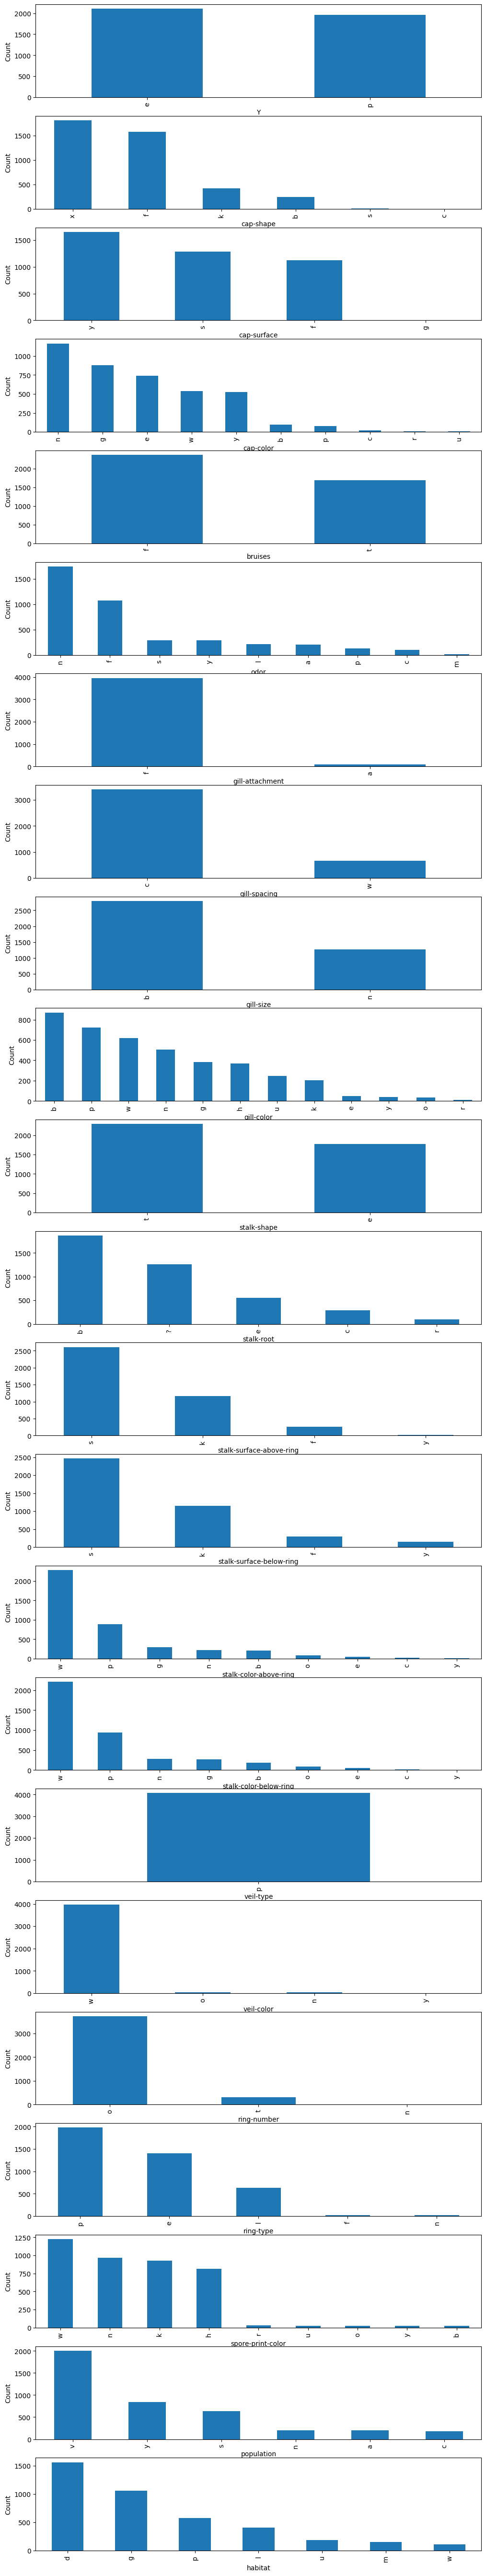

In [ ]:
#各カラムを棒グラフで表示(学習データ)
import matplotlib.pyplot as plt
%matplotlib inline

num_columns = len(train.columns)
height_per_plot = 3
figsize = (12, num_columns * height_per_plot)
fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=figsize)
for i, col in enumerate(train.columns):
  train[col].value_counts().plot(kind='bar', ax=axes[i])
  axes[i].set_ylabel('Count')

plt.tight_layout
plt.show()

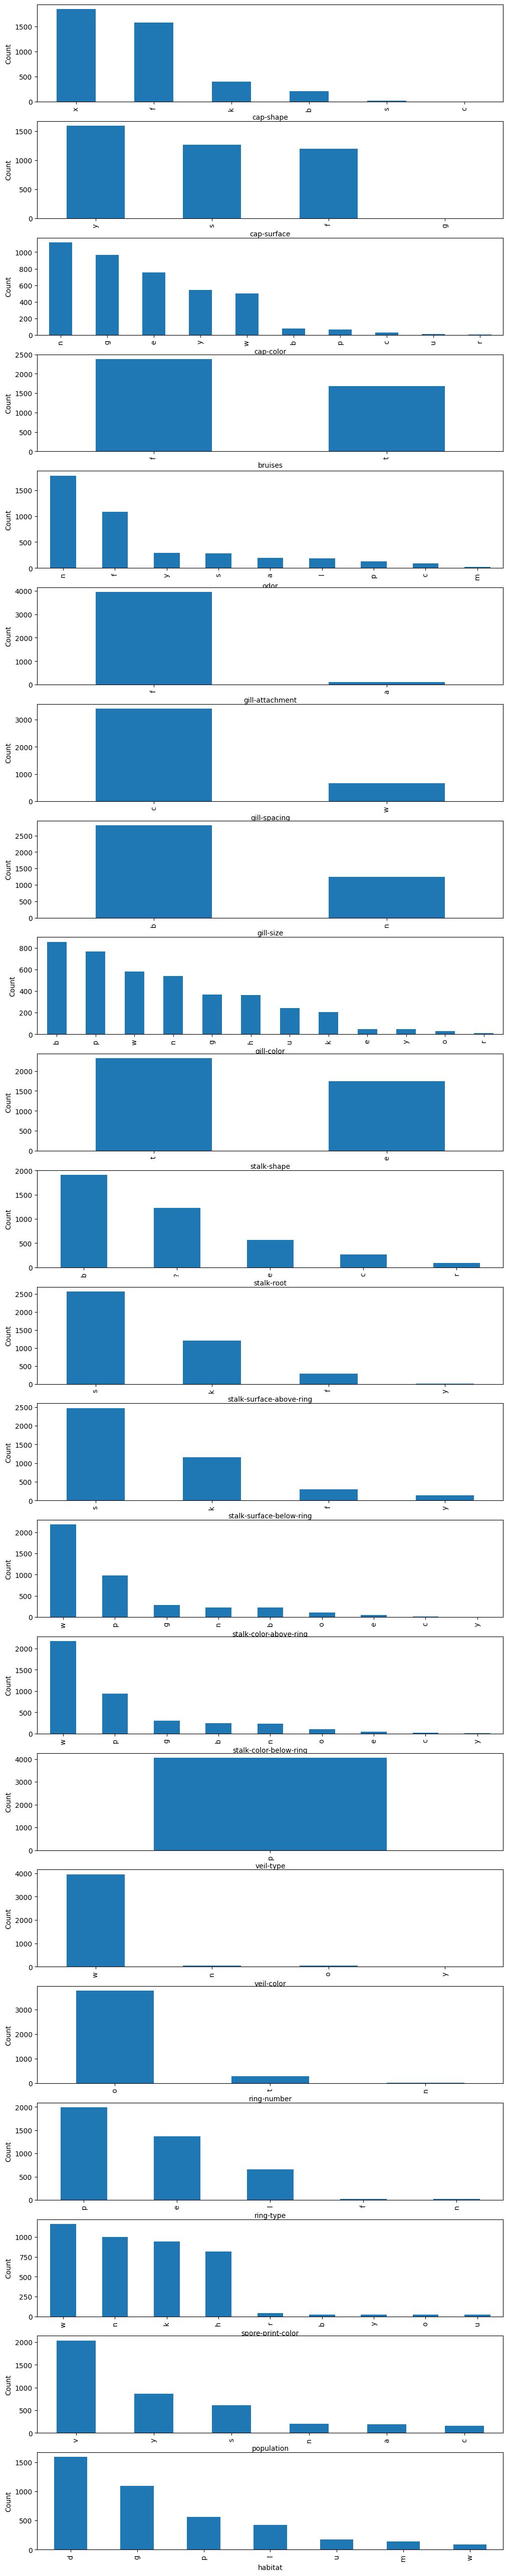

In [ ]:
#各カラムを棒グラフで表示(テストデータ)
import matplotlib.pyplot as plt
%matplotlib inline

num_columns = len(test.columns)
height_per_plot = 3
figsize = (12, num_columns * height_per_plot)
fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=figsize)
for i, col in enumerate(test.columns):
  test[col].value_counts().plot(kind='bar', ax=axes[i])
  axes[i].set_ylabel('Count')

plt.tight_layout
plt.show()

In [ ]:
#veil-typeについては学習データテストデータ共にpしかない為学習に不要と考えカラムを削除
train.drop(['veil-type'],axis=1, inplace=True)
test.drop(['veil-type'],axis=1, inplace=True)
print(train.shape)
print(test.shape)

(4062, 22)
(4062, 21)


In [ ]:
#Label Encodingでobjectデータを数値データに変換(毒キノコは1に食用きのこは0に変換されている。)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train = train.apply(le.fit_transform)
test = test.apply(le.fit_transform)

In [ ]:
#学習データの確認(数値データに変換されているか確認)
train.head()

,Y,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,3,4,0,2,1,0,1,0,...,2,1,7,7,2,1,0,7,4,0
1,1,2,3,9,0,2,1,0,0,7,...,1,1,0,6,2,1,2,1,5,1
2,0,0,3,8,1,3,1,0,0,4,...,2,2,7,7,2,1,4,2,2,3
3,1,5,2,0,1,2,1,0,0,3,...,2,2,7,7,2,1,4,1,4,5
4,1,5,2,8,1,2,1,0,0,10,...,2,0,7,7,2,1,4,1,4,1


In [ ]:
#テストデータの確認(数値データに変換されているか確認)
test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,8,1,2,1,0,0,7,1,...,0,0,7,7,2,1,4,1,4,1
1,2,3,3,1,5,1,0,0,5,1,...,2,2,6,3,2,1,4,3,5,0
2,5,3,2,1,5,1,0,0,10,1,...,2,2,7,6,2,1,4,3,5,0
3,2,2,3,1,2,1,0,0,7,1,...,0,2,7,7,2,1,4,1,4,1
4,5,2,2,0,8,1,0,1,0,1,...,1,2,7,7,2,1,0,7,4,2


In [ ]:
#学習データの確認(Dtypeの確認)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4062 entries, 0 to 4061
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Y                         4062 non-null   int64
 1   cap-shape                 4062 non-null   int64
 2   cap-surface               4062 non-null   int64
 3   cap-color                 4062 non-null   int64
 4   bruises                   4062 non-null   int64
 5   odor                      4062 non-null   int64
 6   gill-attachment           4062 non-null   int64
 7   gill-spacing              4062 non-null   int64
 8   gill-size                 4062 non-null   int64
 9   gill-color                4062 non-null   int64
 10  stalk-shape               4062 non-null   int64
 11  stalk-root                4062 non-null   int64
 12  stalk-surface-above-ring  4062 non-null   int64
 13  stalk-surface-below-ring  4062 non-null   int64
 14  stalk-color-above-ring    4062 non-null 

In [ ]:
#目的変数の確認
train['Y'].value_counts()

,count
Y,
0,2103
1,1959


In [ ]:
#目的変数を別の変数に格納
y_train = train['Y']
train.drop(['Y'],axis=1,inplace=True)

In [ ]:
#データサイズの確認
print(train.shape)
print(test.shape)

(4062, 21)
(4062, 21)


In [ ]:
!pip install lightgbm pandas numpy scikit-learn
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from lightgbm.callback import early_stopping

In [ ]:
#cross-validation / Lightgbmでモデル作成
kf =  KFold(n_splits=5, random_state=0, shuffle=True)
predictions_array=[]
AC_score_array=[]
x = np.array(train)
y = np.array(y_train)

params = {
    'objective':'binary',
    'metric':'binary_logloss',
    'verbose':-1
}

for train_index, test_index in kf.split(train):
  x_train, x_valid = x[train_index], x[test_index]
  y_train, y_valid = y[train_index], y[test_index]

  classifier = LGBMClassifier(**params)

  callbacks = [early_stopping(stopping_rounds=100, verbose=True)]

  classifier.fit(
      x_train, y_train,
      eval_set=[(x_valid, y_valid)],
      eval_metric='binary_logloss',
      callbacks=callbacks
  )

  best_iteration = classifier.best_iteration_
  valid_predictions = classifier.predict_proba(x_valid, num_iteration=best_iteration)[:, 1]
  valid_predictions_class = (valid_predictions > 0.5).astype(int)

  accuracy = accuracy_score(y_valid, valid_predictions_class)
  AC_score_array.append(accuracy)

  predictions_array.append(valid_predictions_class)

  average_AC_accuracy = np.mean(AC_score_array)
  print(f"Average CV Accuracy: {average_AC_accuracy:.4f}")


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 2.59494e-05
Average CV Accuracy: 1.0000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 3.21269e-05
Average CV Accuracy: 1.0000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 2.61299e-05
Average CV Accuracy: 1.0000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 2.84569e-05
Average CV Accuracy: 1.0000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 2.77023e-05
Average CV Accuracy: 1.0000


In [ ]:
#予測
test_predict = classifier.predict(test)

In [ ]:
#予測値の確認
test_predict

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
#予測結果が1の場合はp(毒キノコ)、0の場合はe(食用キノコ)に変換する
converted_array = np.where(test_predict == 0, 'e', 'p')
converted_array

array(['p', 'e', 'e', ..., 'e', 'p', 'e'], dtype='<U1')

In [ ]:
#提出用データの作成
submission = pd.DataFrame({'id':test_ID, 'Y':converted_array})
submission.to_csv('submission.csv', index=None, header=None)